In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

In [409]:
train = pd.read_csv('Used Car Prediction\\train-data.csv')
test =  pd.read_csv('Used Car Prediction\\test-data.csv')

In [410]:
train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [411]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [1]:
test.isnull().sum()

NameError: name 'test' is not defined

In [412]:
train = train.drop(labels = ['Unnamed: 0','New_Price'], axis=1)

In [413]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [414]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [415]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


# Handling Missing Data

#####Converting km\kg to kmpl and handling the missing values in Mileage

In [416]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [417]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [418]:
train['Mileage'].value_counts()

17.0 kmpl     172
18.9 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
17.16 kmpl      1
22.8 km/kg      1
14.33 kmpl      1
8.5 kmpl        1
21.2 kmpl       1
Name: Mileage, Length: 442, dtype: int64

In [419]:
train['Mileage'].fillna('17.0 kmpl', inplace = True)

In [420]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [421]:
for i in range(0,len(train['Mileage'])):
    if 'km/kg' in train['Mileage'][i]:
        val = train['Mileage'][i]
        val = val.replace('km/kg', '')
        train['Mileage'][i] = round(float(val) * 0.75 , 2)
    elif 'kmpl' in train['Mileage'][i]:
        val = train['Mileage'][i]
        val = val.replace('kmpl', '')
        train['Mileage'][i] = float(val)
        

C:\Users\Kajal\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Kajal\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [422]:
train['Mileage'] = train['Mileage'].apply(lambda x : str(x).split(' ')[0])
train['Mileage'] = train['Mileage'].apply(lambda x : float(x))
train['Mileage']

0       19.95
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
6014    28.40
6015    24.40
6016    14.00
6017    18.90
6018    25.44
Name: Mileage, Length: 6019, dtype: float64

#handling missing value of Engine

In [423]:
train['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2999 CC      1
1797 CC      1
3200 CC      1
2720 CC      1
1422 CC      1
Name: Engine, Length: 146, dtype: int64

In [424]:
train['Engine'].fillna('1197 CC', inplace = True)

In [425]:
train['Engine'] = train['Engine'].apply(lambda x : str(x).split(' ')[0])

handling missing values of Power

In [426]:
train['Power'].value_counts()

74 bhp       235
98.6 bhp     131
73.9 bhp     125
140 bhp      123
78.9 bhp     111
            ... 
103 bhp        1
74.96 bhp      1
237.4 bhp      1
76.9 bhp       1
367 bhp        1
Name: Power, Length: 372, dtype: int64

In [427]:
train['Power'] = train['Power'].fillna('74 bhp')
train['Power'] = train['Power'].replace('null bhp', '0.0')

In [428]:
train['Power'] = train['Power'].apply(lambda x: str(x).split(' ')[0])

In [429]:
train['Power'] = train['Power'].apply(lambda x : float(x))

handling missing data of Seats

In [430]:
train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [431]:
train['Seats'] = train['Seats'].fillna(5.0)

In [432]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.95,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


# EDA

In [433]:
train.corr()

,Year,Kilometers_Driven,Mileage,Power,Seats,Price
Year,1.000000,-0.173048,0.325246,0.075513,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065848,0.023768,0.082782,-0.011493
Mileage,0.325246,-0.065848,1.000000,-0.431723,-0.298558,-0.303110
Power,0.075513,0.023768,-0.431723,1.000000,0.110259,0.757695
Seats,0.015204,0.082782,-0.298558,0.110259,1.000000,0.052811
Price,0.305327,-0.011493,-0.303110,0.757695,0.052811,1.000000


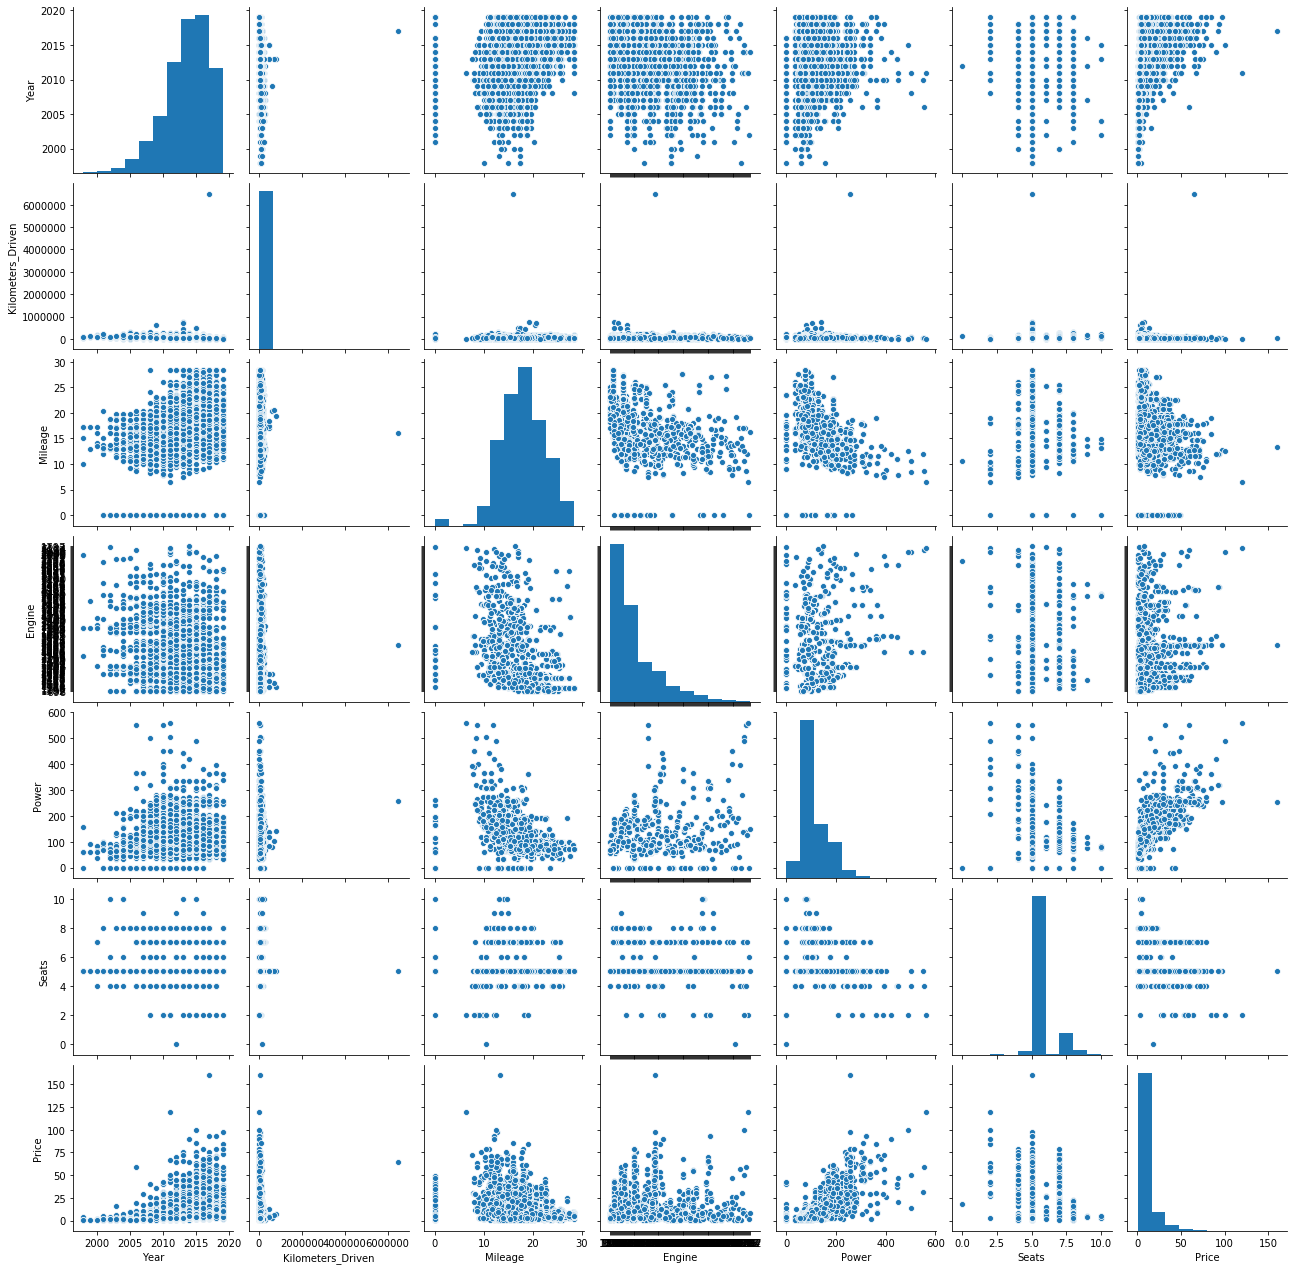

In [434]:
sns.pairplot(train)

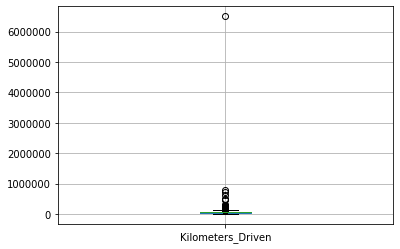

In [435]:
train.boxplot('Kilometers_Driven')

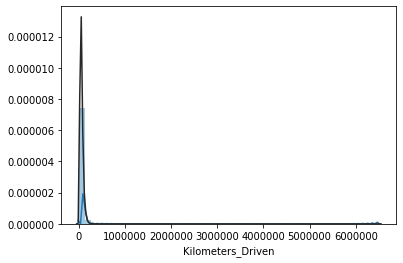

In [436]:
from scipy import stats
import pylab
sns.distplot(train['Kilometers_Driven'], kde = 'False',fit = stats.johnsonsu)

((array([-3.68321976, -3.450751  , -3.32276802, ...,  3.32276802,
          3.450751  ,  3.68321976]),
  array([    171,     600,    1000, ...,  720000,  775000, 6500000],
        dtype=int64)),
 (37634.57788019349, 58738.38029573019, 0.4121498625306941))

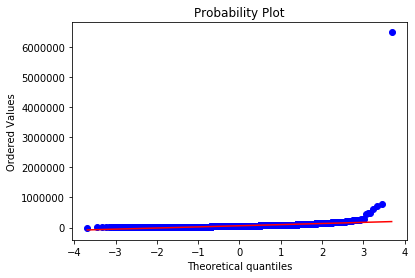

In [437]:
stats.probplot(train['Kilometers_Driven'], dist = 'norm', plot = pylab)

Lets find extreme outlier for the data

In [438]:
train.loc[train['Kilometers_Driven'] > 300000 , 'Kilometers_Driven'] = 300000

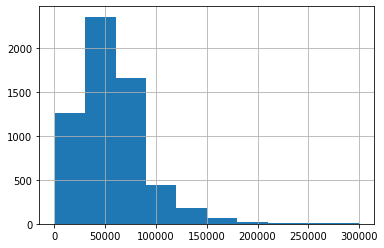

In [439]:
train['Kilometers_Driven'].hist()

The data is not normally distributed and therefore we will transform the data.

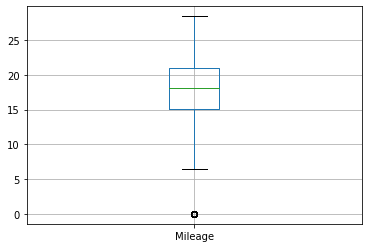

In [440]:
train.boxplot(column = 'Mileage')

Text(0.5, 1.0, 'Mileage')

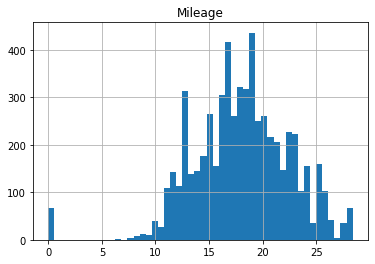

In [441]:
figure = train.Mileage.hist(bins = 50)
figure.set_title('Mileage')

#removing outlier

In [442]:
import scipy.stats as stat
import pylab

((array([-3.68321976, -3.450751  , -3.32276802, ...,  3.32276802,
          3.450751  ,  3.68321976]),
  array([ 0. ,  0. ,  0. , ..., 28.4, 28.4, 28.4])),
 (4.447040112910204, 18.06741485296561, 0.9850998559143994))

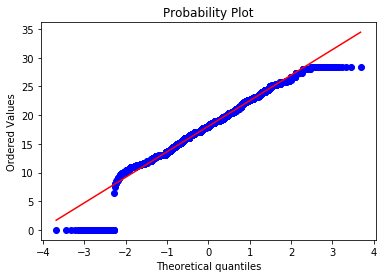

In [443]:
stat.probplot(train['Mileage'],dist = 'norm', plot = pylab)

In [444]:
upper_bound = train['Mileage'].mean() + 3 * train['Mileage'].std()
lower_bound = train['Mileage'].mean() - 3 * train['Mileage'].std()

In [445]:
print('Upper Bound :', upper_bound , 'Lower Bound:', lower_bound)

Upper Bound : 31.60379998325358 Lower Bound: 4.531029722677731


In [446]:
train.loc[train['Mileage'] < lower_bound , 'Mileage'] = lower_bound
train.loc[train['Mileage'] > upper_bound , 'Mileage'] = upper_bound

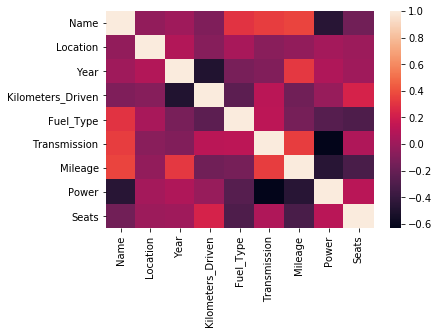

In [461]:
sns.heatmap(train.drop('Price',axis = 1).corr())

In [495]:
threshold = 0.5

In [496]:
def get_rel_col(dataset, threshold):
    colrel = set()
    rel_mat = dataset.corr()
    for i in range(len(rel_mat.columns)):
        for j in range(i):
            if abs(rel_mat.iloc[i,j])> threshold:
                column = rel_mat.columns[i]
                colrel.add(column)
    return (colrel)        

In [497]:
get_rel_col(train.drop('Price',axis = 1), threshold)

{'Power'}

There is not much correlation between the feature this means the features are independant and there is no need to select top n features.

# Handling Categorical Variables

####Name###

In [447]:
train['Name'] = train['Name'].apply(lambda x : str(x).split(' ')[0])

In [448]:
name_map = train['Name'].value_counts().to_dict()

In [449]:
train['Name'] = train['Name'].map(name_map)

In [450]:
location_map = train['Location'].value_counts().to_dict()
train['Location'] = train['Location'].map(location_map)

###Owner_Type##

In [451]:
train['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [452]:
train.loc[train['Owner_Type'] == 'First', 'Owner_Type'] = 1
train.loc[train['Owner_Type'] == 'Second', 'Owner_Type'] = 2
train.loc[train['Owner_Type'] == 'Third', 'Owner_Type'] = 3
train.loc[train['Owner_Type'] == 'Fourth & Above', 'Owner_Type'] = 4

In [453]:
train['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [454]:
from sklearn.preprocessing import LabelEncoder

fuel = LabelEncoder()
transmission = LabelEncoder()

train['Fuel_Type'] = fuel.fit_transform(train['Fuel_Type'])
train['Transmission'] = transmission.fit_transform(train['Transmission'])

In [455]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1211,790,2010,72000,0,1,1,19.95,998,58.16,5.0,1.75
1,1107,622,2015,41000,1,1,1,19.67,1582,126.20,5.0,12.50
2,608,494,2011,46000,4,1,1,18.20,1199,88.70,5.0,4.50
3,1211,494,2012,87000,1,1,1,20.77,1248,88.76,7.0,6.00
4,236,636,2013,40670,1,0,2,15.20,1968,140.80,5.0,17.74


In [457]:
X = train.drop('Price', axis = 1)
Y = train['Price']

In [472]:
from sklearn.model_selection import train_test_split

In [473]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [474]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [477]:
linear_model.score(X_train, Y_train)

0.6989178143510716

In [478]:
prediction = linear_model.predict(X_test)

In [479]:
mape = np.mean(np.abs((Y_test - prediction)/Y_test))

In [480]:
prediction

array([ 6.58456525,  7.91803881,  4.48446679, ..., -0.61770532,
       25.56736049,  0.77777626])

In [481]:
mape

0.7820082007011331

In [483]:
Accuracy = 1 - mape
Accuracy

0.21799179929886692